In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Loading dataset

In [4]:
file_name = '/kaggle/input/gymanalysis/gym_members_exercise_tracking.csv'
gym = pd.read_csv(file_name)

In [5]:
gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [6]:
gym.dtypes

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

In [7]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [9]:
gym.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [8]:
gym.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [12]:
corr_features = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
        'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']
gym_corr = gym[corr_features].corr()
gym_corr

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
Age,1.000000,-0.036340,-0.027837,-0.017073,0.035969,0.004354,-0.019912,-0.154679,0.002370,0.041528,0.008055,-0.018676,-0.013691
Weight (kg),-0.036340,1.000000,0.365321,0.057061,0.009717,-0.032138,-0.013666,0.095443,-0.225512,0.394276,-0.011769,0.003379,0.853158
Height (m),-0.027837,0.365321,1.000000,-0.017660,-0.014776,-0.005090,-0.010206,0.086348,-0.235521,0.393533,-0.011270,-0.010267,-0.159469
Max_BPM,-0.017073,0.057061,-0.017660,1.000000,-0.039751,0.036647,0.010051,0.002090,-0.009056,0.031621,-0.029099,0.000545,0.067105
Avg_BPM,0.035969,0.009717,-0.014776,-0.039751,1.000000,0.059636,0.016014,0.339659,-0.007302,-0.002911,-0.010681,-0.000888,0.021605
Resting_BPM,0.004354,-0.032138,-0.005090,0.036647,0.059636,1.000000,-0.016649,0.016518,-0.016834,0.007726,-0.007967,0.001758,-0.032543
Session_Duration (hours),-0.019912,-0.013666,-0.010206,0.010051,0.016014,-0.016649,1.000000,0.908140,-0.581520,0.283411,0.644140,0.764768,-0.006493
Calories_Burned,-0.154679,0.095443,0.086348,0.002090,0.339659,0.016518,0.908140,1.000000,-0.597615,0.356931,0.576150,0.694129,0.059761
Fat_Percentage,0.002370,-0.225512,-0.235521,-0.009056,-0.007302,-0.016834,-0.581520,-0.597615,1.000000,-0.588683,-0.537060,-0.654363,-0.119258
Water_Intake (liters),0.041528,0.394276,0.393533,0.031621,-0.002911,0.007726,0.283411,0.356931,-0.588683,1.000000,0.238563,0.304104,0.213697


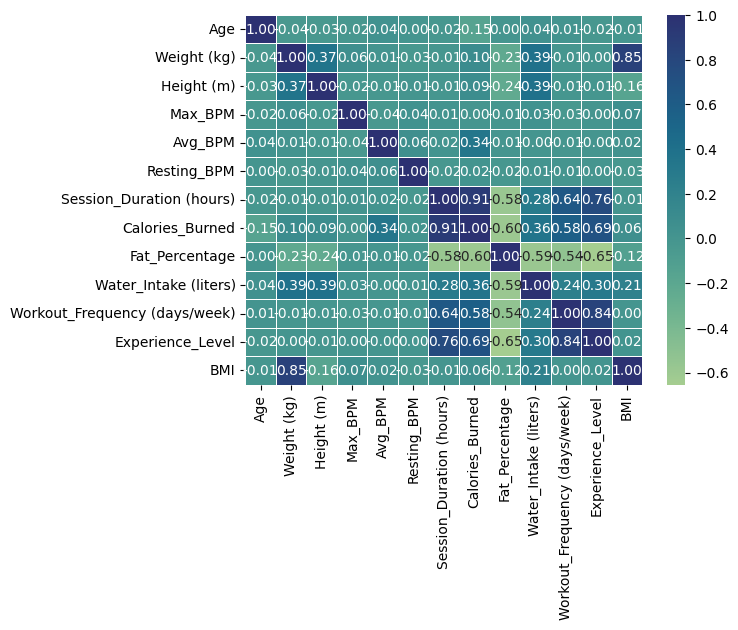

In [13]:
sns.heatmap(gym_corr, annot=True, fmt='.2f',linewidths=0.5,cmap="crest" );

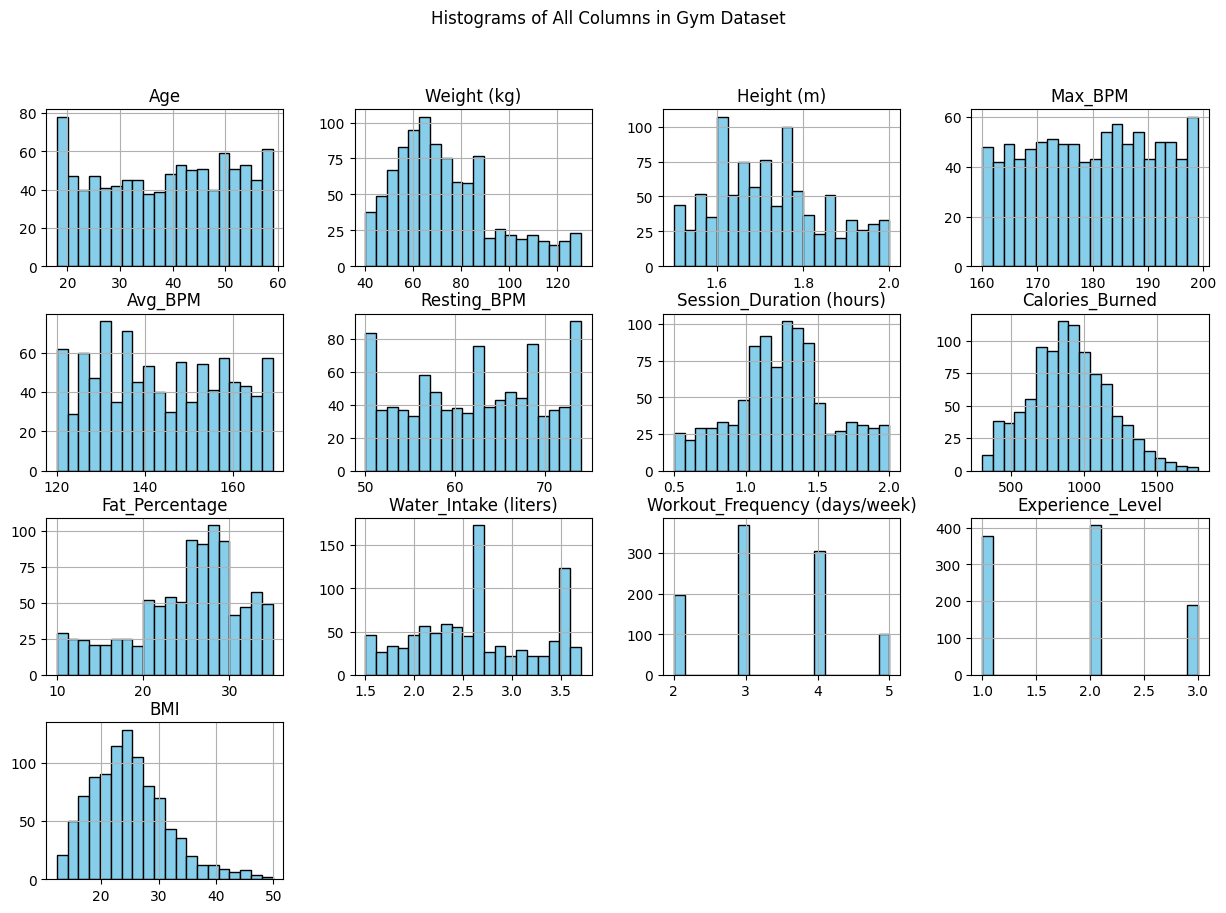

In [18]:
gym.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of All Columns in Gym Dataset')
plt.show();

In [19]:
gym.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [36]:
work=gym.Workout_Type.value_counts()
work

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

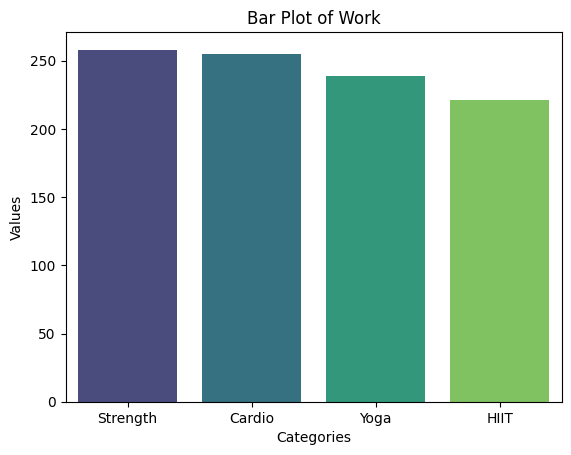

In [39]:
sns.barplot(x=work.index, y=work.values, palette="viridis")
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot of Work')
plt.show()

In [25]:
expe_work = pd.crosstab(gym.Experience_Level, gym.Workout_Type)
expe_work

Workout_Type,Cardio,HIIT,Strength,Yoga
Experience_Level,,,,
1,109,85,97,85
2,102,87,116,101
3,44,49,45,53


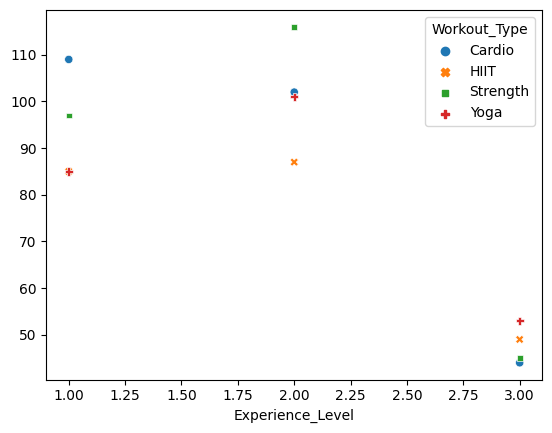

In [40]:
sns.scatterplot(expe_work);

In [43]:
gym.Gender.value_counts()

Gender
Male      511
Female    462
Name: count, dtype: int64

In [41]:
experience_gender = pd.crosstab(gym.Experience_Level, gym.Gender)
experience_gender

Gender,Female,Male
Experience_Level,,
1,179,197
2,193,213
3,90,101


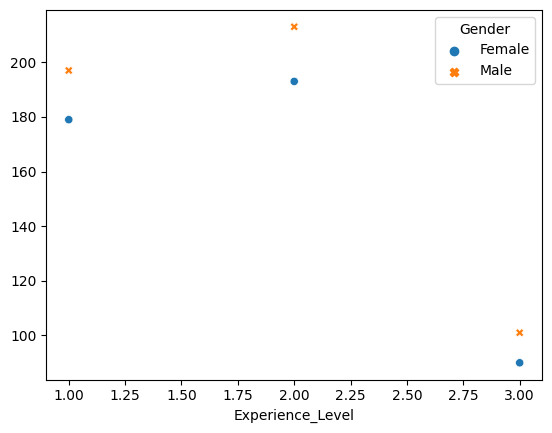

In [53]:
sns.scatterplot(experience_gender);

# Model For Experience classification

In [56]:
gym.dtypes

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

In [57]:
gym.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

# Spliting data into features and label (X,y)

In [58]:
X = gym.drop('Experience_Level', axis=1)
y = gym['Experience_Level']

In [59]:
X

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,37.74


In [60]:
y

0      3
1      2
2      2
3      1
4      1
      ..
968    3
969    1
970    3
971    2
972    1
Name: Experience_Level, Length: 973, dtype: int64

In [61]:
# Converting categorical data into numeric using OneHotEncoder and ColumnTransformer
categorical_features = ['Gender','Workout_Type']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot, categorical_features)],remainder='passthrough')
transform_X = transformer.fit_transform(X)
transform_X

array([[ 0.  ,  1.  ,  0.  , ...,  3.5 ,  4.  , 30.2 ],
       [ 1.  ,  0.  ,  0.  , ...,  2.1 ,  4.  , 32.  ],
       [ 1.  ,  0.  ,  1.  , ...,  2.3 ,  4.  , 24.71],
       ...,
       [ 1.  ,  0.  ,  1.  , ...,  2.7 ,  5.  , 19.5 ],
       [ 0.  ,  1.  ,  0.  , ...,  2.1 ,  3.  , 37.74],
       [ 0.  ,  1.  ,  0.  , ...,  3.5 ,  2.  , 33.38]])

In [62]:
# Split data into train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transform_X, y, test_size=0.2)

In [64]:
# Instanciate model
np.random.seed(42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

In [75]:
print(f"Accuracy Scores: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Recall Score: {recall_score(y_test, y_preds, average='macro') * 100:.2f}%")
print(f"Precision Score: {precision_score(y_test, y_preds, average='macro') * 100:.2f}%")

Accuracy Scores: 90.26%
Recall Score: 91.78%
Precision Score: 91.90%


# Improve performance of model

In [78]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
grid = {
    'n_estimators': [100, 200, 500,1000,1200],
    'max_depth' : [None,5, 10, 20,30],
    'max_features' : ['auto', 'sqrt'],
    'min_samples_split' : [2,4,6],
    'min_samples_leaf' : [1,2,4]
}

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transform_X, y, test_size=0.2)
clf = RandomForestClassifier()

rs_clf = RandomizedSearchCV(estimator=clf, param_distributions= grid, n_iter=10, cv=5, verbose=2)

rs_clf.fit(X_train,y_train)
rs_clf_y_preds = rs_clf.predict(X_test)

rs_clf.best_params_
                        

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   3.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   3.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   3.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   3.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   3.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   3.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   3.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   3.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   3.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   3.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, max_fe

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10}

In [82]:
print(f"Accuracy Scores: {accuracy_score(y_test,rs_clf_y_preds)*100:.2f}%")
print(f"Recall Score: {recall_score(y_test, rs_clf_y_preds, average='macro') * 100:.2f}%")
print(f"Precision Score: {precision_score(y_test, rs_clf_y_preds, average='macro') * 100:.2f}%")

Accuracy Scores: 91.79%
Recall Score: 93.15%
Precision Score: 93.86%


In [83]:
import pickle

In [85]:
pickle.dump(rs_clf,open('gym_classification.pkl', 'wb'))

In [86]:
pickle.dump(clf,open('gym_classification2.pkl', 'wb'))